In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Sometimes we can have the relation which is non-linear directly but can have linear relationship if polynomial is 
# Considered. For Example, y = x^2. If we take x^2 = t, then equation becomes y = t, which is linear now. 
# So we try to fit a polynomial function to see if that works or not.

In [88]:
# Data generation
N = 100
X = np.random.uniform(low=-100, high=100, size=N)
X2 = X**2

Y = 0.1*X2 + X + 1 + np.random.normal(scale=40, size=N)

In [111]:
# let's try to model this data with normal linear regression, Y = Xw + b. 
# Also, lets consume the bias term in w itself this time 

# Adding the bias term
bias_term = np.ones((N, 1))
X_with_bias = np.hstack((bias_term, X.reshape(N, 1)))

# Calculating the weight 
w = np.linalg.solve(a = np.dot(X_with_bias.T, X_with_bias), b = np.dot(X_with_bias.T, Y))

# Calculating new predictions
Y_predicted = X_with_bias.dot(w)

In [113]:
# Calculating the r squared 
ss_res = (Y - Y_predicted).dot(Y - Y_predicted)
ss_tot = (Y - Y.mean()).dot(Y - Y.mean())
r2 = 1 - ss_res/ss_tot
print("r2: ", r2)

r2:  0.02283120368956515


In [114]:
# This is not a good value of r squared. That means our data is not linear. 
# Let's look at the original data once.

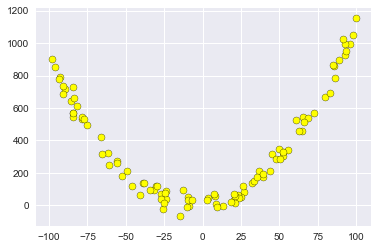

In [115]:
plt.scatter(X, Y, edgecolors="black", color="yellow")
plt.show()

In [52]:
# Above data seems like a distorted x^2 or polynomial in nature.

In [119]:
# Now suppose we dont know the data as such and we want to model the data in polynomial way. 
# We will add the values of polynomial of different degrees to our data.
# This time we will take the bias term inside X only. 

bias_term = np.ones((N, 1))
X_poly = np.hstack((bias_term, X.reshape(N, 1), (X**2).reshape(N, 1)))

# Solving the equation 
w = np.linalg.solve(a = np.dot(X_poly.T, X_poly), b = np.dot(X_poly.T, Y))

# Predicting the values
Y_predicted = X_poly.dot(w)

In [120]:
# Calculating the r squared 
ss_res = (Y - Y_predicted).dot(Y - Y_predicted)
ss_tot = (Y - Y.mean()).dot(Y - Y.mean())
r2 = 1 - ss_res/ss_tot
print("r2: ", r2)

r2:  0.984665401888976


In [122]:
# This time the r-squared is close to 1, which means our model did very good job by transforming the data into polynomial 
# degrees and then modeling the data using linear regression. 

# Sometimes we need to see the data and try to do trial and run to see if there is any polynomial relationship of data.